# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Фиксируем seed для воспроизводимости
def seed_all(seed: int) -> None:
    np.random.seed(seed)
    random.seed(seed)

seed_all(42)

# Load Data

In [3]:
# Загрузка и первичная обработка датасета с новостями
news_df = pd.read_csv('starter/artefacts/data/lenta-ru-news.csv', usecols=['text', 'tags'], low_memory=False)
news_df = news_df.rename(columns={'text': 'Text', 'tags': 'Label'})
news_df = news_df.dropna(subset=['Text', 'Label'])
news_df = news_df.drop_duplicates(['Text'])
news_df.head()

,Text,Label
0,Бои у Сопоцкина и Друскеник закончились отступ...,Первая мировая
1,"Министерство народного просвещения, в виду про...",Первая мировая
2,"Штабс-капитан П. Н. Нестеров на днях, увидев в...",Первая мировая
3,Фотограф-корреспондент Daily Mirror рассказыва...,Первая мировая
4,"Лица, приехавшие в Варшаву из Люблина, передаю...",Первая мировая


In [4]:
# Добавление токсичных комментов и преобразование их нужному виду
toxic_df = pd.read_csv('starter/artefacts/data/labeled.csv')
toxic_df = toxic_df.rename(columns={'comment': 'Text', 'toxic': 'Label'})
toxic_df['Label'] = toxic_df['Label'].astype(int).replace({0: 'not_toxic_text', 1: 'toxic_text'})
toxic_df = toxic_df.dropna(subset=['Text', 'Label'])
toxic_df = toxic_df.drop_duplicates(['Text'])
toxic_df.head()

,Text,Label
0,"Верблюдов-то за что? Дебилы, бл...\n",toxic_text
1,"Хохлы, это отдушина затюканого россиянина, мол...",toxic_text
2,Собаке - собачья смерть\n,toxic_text
3,"Страницу обнови, дебил. Это тоже не оскорблени...",toxic_text
4,"тебя не убедил 6-страничный пдф в том, что Скр...",toxic_text


# Dataset preparation

In [5]:
# Группировка по категориям и подсчет количества записей в каждой категории
category_counts = news_df['Label'].value_counts()

# Фильтрация категорий с количеством записей от 100 до 400
filtered_categories = category_counts[(category_counts >= 100) & (category_counts <= 400)]

# Случайный выбор 5 категорий из отфильтрованных
random_categories = filtered_categories.sample(n=5, random_state=42)

# Вывод выбранных категорий
print("Случайно выбранные категории:\n", random_categories)

Случайно выбранные категории:
 Label
Киберпреступность    376
Английский футбол    348
Финансы компаний     156
Автобизнес           310
Авто                 204
Name: count, dtype: int64


In [6]:
# Оставлю по 200 примеров токсичных и нетоксичных
toxic_df = toxic_df.groupby('Label').apply(lambda x: x.sample(n=200, random_state=42)).reset_index(drop=True)

In [7]:
# Датасет для дальнейшей работы
df = pd.concat([news_df[news_df['Label'].isin(list(random_categories.index))], toxic_df]).reset_index(drop=True)
df

,Text,Label
0,Арбитражный суд Ханты-Мансийского автономного ...,Финансы компаний
1,Группа «Онэксим» Михаила Прохорова переуступил...,Финансы компаний
2,"Миноритарный пакет «Башнефти», остающийся у АФ...",Финансы компаний
3,Крупнейшие российские госкомпании-экспортеры —...,Финансы компаний
4,"Инвестиционная компания «Авиализинг», подавшая...",Финансы компаний
...,...,...
1789,Нужно изолировать каклов с либерахами и желате...,toxic_text
1790,ФАЯЯЯЯЯЯ ТУТТУТУТУТТУТУТУТРУРУТУРУТУ\n,toxic_text
1791,"Я ваш коммент курсором отпиздил, настолько он ...",toxic_text
1792,ПЕДРОНЫ НА МЕСТЕ? СОТОНИСТЫ ОЧКАРИКИ ЗДЕСЬ?\n,toxic_text


# EDA

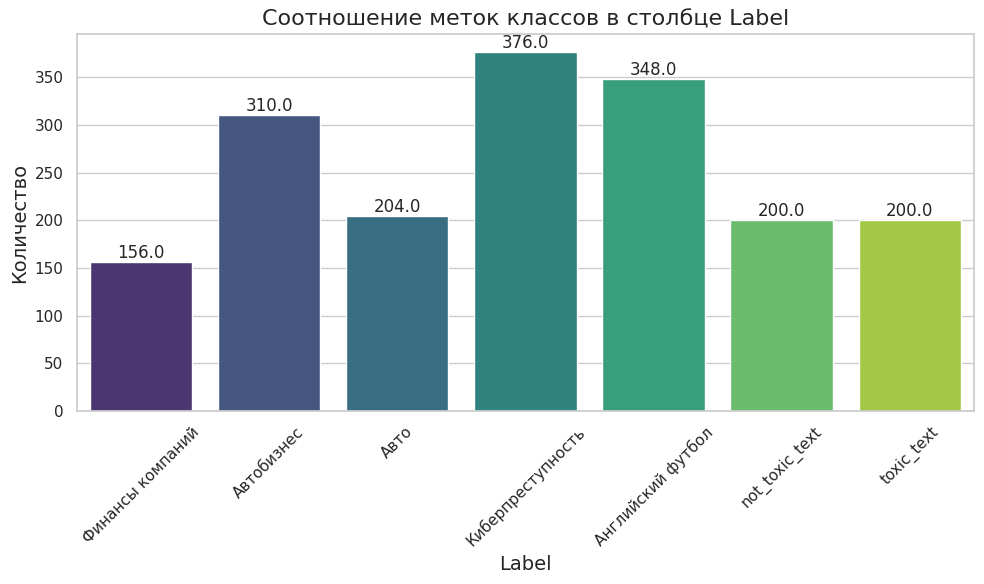

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Label', palette='viridis')

plt.xlabel("Label", fontsize=14)
plt.ylabel("Количество", fontsize=14)
plt.title('Соотношение меток классов в столбце Label', fontsize=16)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

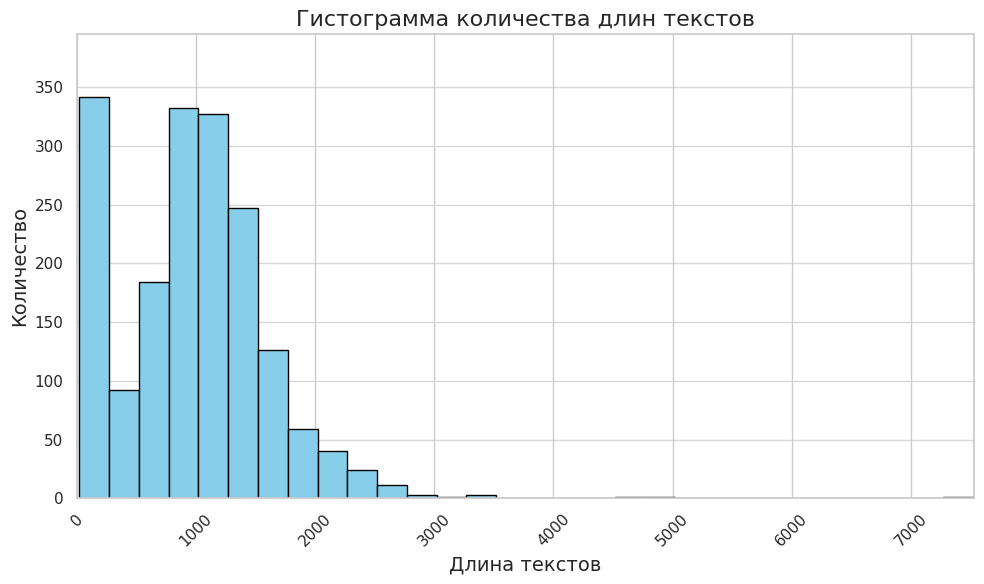

In [9]:
plt.figure(figsize=(10, 6))
plt.hist(df['Text'].apply(lambda x: len(x)), bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Длина текстов", fontsize=14)
plt.ylabel("Количество", fontsize=14)
plt.title('Гистограмма количества длин текстов', fontsize=16)
plt.xlim(0, max(df['Text'].apply(lambda x: len(x))) + 10)
plt.ylim(0, plt.ylim()[1] * 1.1)
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

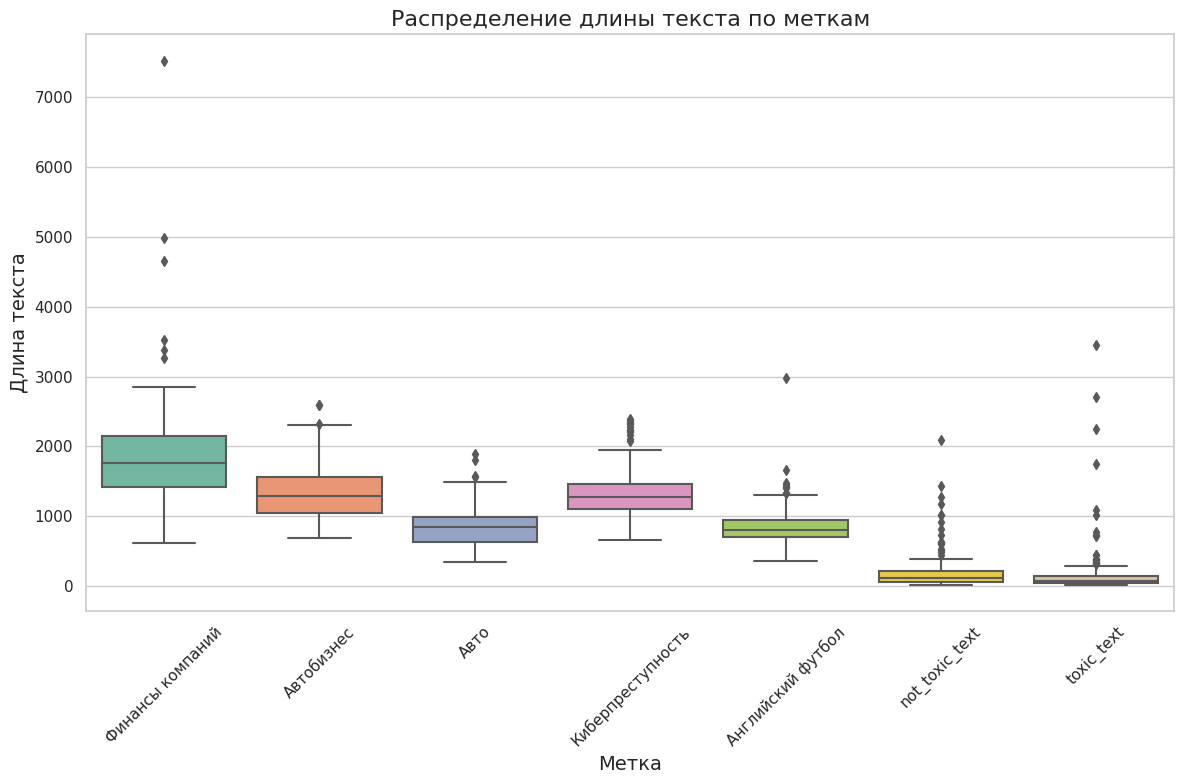

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=df, y=df['Text'].apply(len), x='Label', palette='Set2')
plt.xlabel('Метка', fontsize=14)
plt.ylabel('Длина текста', fontsize=14)
plt.title('Распределение длины текста по меткам', fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save dataset

In [11]:
df.to_csv('df.csv', index=False)